In [8]:
!pip install beautifulsoup4
!pip install lxml
!pip install requests

In [9]:
from bs4 import BeautifulSoup
import requests

In [10]:

all_needed_data = []

def get_data_about_a_city(city, url):
  global all_needed_data

  cur_url = url
  headers = {
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'
  }

  response = requests.get(cur_url, headers=headers)
  soup = BeautifulSoup(response.text, 'html.parser')

  items = soup.find_all(class_='values')

  years_list = ['2020', '2021', '2022', '2023']
  months_list = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']*4

  #Паршу данные об уровне УФ
  uf_level_data = soup.find_all(class_='widget-row widget-row-radiation row-with-caption') #уф

  uf_data = [] #лист для всей инфы
  for i in uf_level_data[:48]:
    uf_items = i.find_all('div', class_='row-item') # забираю все вложенные элементы с классом row-item
    for z in uf_items:
        uf_data.append(z.text.strip())
  uf_data = uf_data[:48] #оставляю первые 48 значений, так как меня интересует только 2020-2023 годы, опендикс 2024 мне не нужен

  #Паршу данные о мин, макс температуре по годам и месецам
  months_cnt = 0
  if items:
    months = items[0].find_all(class_='value')[:48] #оставляю первые 48 значений, так как меня интересует только 2020-2023 годы, опендикс 2024 мне не нужен

    for month in months:
      list_for_data_about_city = [city, years_list[int(months_cnt/12)], months_list[months_cnt]]

      min_t = month.find(class_='mint')
      max_t = month.find(class_='maxt')

      if min_t:
              # Получаем значение из атрибута 'value'
              min_temperature_value = min_t.find('temperature-value')['value']
              list_for_data_about_city.append(min_temperature_value)
      if max_t:
              # Получаем значение из атрибута 'value'
              max_temperature_value = max_t.find('temperature-value')['value']
              list_for_data_about_city.append(max_temperature_value)

      list_for_data_about_city.append(uf_data[months_cnt]) #добавляю данные об уф показателе
      all_needed_data.append(list_for_data_about_city)

      months_cnt+=1

#Выбираю 4 репрезетативных города и запускаю функцию для них
get_data_about_a_city('Москва', 'https://www.gismeteo.ru/weather-moscow-4368/archive/')
get_data_about_a_city('Санкт-Петербург', 'https://www.gismeteo.ru/weather-sankt-peterburg-4079/archive/')
get_data_about_a_city('Певек', 'https://www.gismeteo.ru/weather-pevek-4042/archive/') #самый северный город России
get_data_about_a_city('Дербент', 'https://www.gismeteo.ru/weather-derbent-5268/archive/') #самый южный город России

print(all_needed_data)

[['Москва', '2020', 'Январь', '-5', '4', '2'], ['Москва', '2020', 'Февраль', '-16', '7', '4'], ['Москва', '2020', 'Март', '-10', '16', '6'], ['Москва', '2020', 'Апрель', '-7', '14', '7'], ['Москва', '2020', 'Май', '2', '22', '9'], ['Москва', '2020', 'Июнь', '7', '27', '9'], ['Москва', '2020', 'Июль', '9', '28', '9'], ['Москва', '2020', 'Август', '8', '28', '8'], ['Москва', '2020', 'Сентябрь', '5', '24', '7'], ['Москва', '2020', 'Октябрь', '0', '19', '5'], ['Москва', '2020', 'Ноябрь', '-6', '9', '2'], ['Москва', '2020', 'Декабрь', '-13', '1', '2'], ['Москва', '2021', 'Январь', '-27', '2', '2'], ['Москва', '2021', 'Февраль', '-27', '4', '4'], ['Москва', '2021', 'Март', '-25', '9', '7'], ['Москва', '2021', 'Апрель', '-3', '21', '7'], ['Москва', '2021', 'Май', '3', '29', '9'], ['Москва', '2021', 'Июнь', '6', '32', '9'], ['Москва', '2021', 'Июль', '12', '31', '9'], ['Москва', '2021', 'Август', '8', '28', '8'], ['Москва', '2021', 'Сентябрь', '1', '21', '6'], ['Москва', '2021', 'Октябрь', '-2

In [11]:
import pandas as pd

In [13]:
df = pd.DataFrame(all_needed_data, columns=['Город', 'Год', 'Месяц', 'Мин T', 'Макс T', 'УФ-индекс'])

df_test = df.copy
# Сохраняем всю инфу в Excel табличку
df.to_excel('gesmeteo_погодные_данные_по_городам.xlsx', index=False)

In [106]:
#Проверяю типы данных и произвожу паническую очистку(даже если не надо - на всякий случай очищаю от Na)

#print(df.dtypes)
#Мин и макс температура и показатель УФ индекса должны быть числом -> преобразую в числовой тип(но с учетом того, что числа у температур могут быть и < 0)
df['Мин T'] = pd.to_numeric(df['Мин T'])
df['Макс T'] = pd.to_numeric(df['Макс T'])
df['УФ-индекс'] = df['УФ-индекс'].astype(int)

#Удаляю строки с пропусками(если такие не находятся - ничего не удаляется, но на всякий случай прописываю)
df = df.dropna()

print('\nПервые строки данных после преобразований и очистки:')
print(df.head())

print('\nТипы днных после преобразований:')
print(df.dtypes)

#Описание данных и их типов:
#В таблице приведено 6 столбцов и 193 строки
#В первом столбце располагается информация о городе(один из четырех выбранных: Москва, СПБ, Певек, Дербент), данные о котором далее представлены в соответствующей строчке. Тип данных: object (категориальные данные)
#Во втором столбце располагается информация о годе сбора данных (промежуток 2020-2023 годы). Тип данных: object (категориальные данные)
#В третьем столбце располагается информация о месяце сбора данных в текстовом виде. Тип данных: object (категориальные данные)
#В четвертом столбце располагается информация о минимальной температуре указанного в предыдущих ячейках строки периода. Тип данных: int64 (все значения целые, но могут быть < 0, что предусматривает int64)
#В пятом столбце располагается информация о максимальной температуре указанного в предыдущих ячейках строки периода. Тип данных: int64 (все значения целые, но могут быть < 0, что предусматривает int64)
#В шестом столбце располагается информация о значении УФ-индекса* указанного в предыдущих ячейках строки периода. Тип данных: int64 (все значения целые)

#УФ-индекс* - был выбран в качестве данных для анализа, так как он показывает интенсивность ультрафиолетового излучения Солнца, доходящего до поверхности Земли. Проследив изменения в УФ-индексе одинаковых сезонов разных лет, можно выдвигать гипотезы о влиянии/отсутствии влияния глобального потепления на представленные города.



Первые строки данных после преобразований и очистки:
    Город   Год    Месяц  Мин T  Макс T  УФ-индекс
0  Москва  2020   Январь     -5       4          2
1  Москва  2020  Февраль    -16       7          4
2  Москва  2020     Март    -10      16          6
3  Москва  2020   Апрель     -7      14          7
4  Москва  2020      Май      2      22          9

Типы днных после преобразований:
Город        object
Год          object
Месяц        object
Мин T         int64
Макс T        int64
УФ-индекс     int64
dtype: object


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Город      192 non-null    object
 1   Год        192 non-null    object
 2   Месяц      192 non-null    object
 3   Мин T      192 non-null    int64 
 4   Макс T     192 non-null    int64 
 5   УФ-индекс  192 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.1+ KB
None

--------------------------------------------------

Описательные статистики для числовых столбцов:
           count       mean        std   min   25%   50%    75%   max
Мин T      192.0  -5.000000  15.059046 -39.0 -16.0  -1.0   6.00  23.0
Макс T     192.0  13.697917  11.799033 -19.0   4.0  13.0  24.00  33.0
УФ-индекс  192.0   5.843750   3.033247   0.0   4.0   6.0   8.25  11.0

--------------------------------------------------

Количество пропущенных значений:
Город        0
Год          0
Месяц 

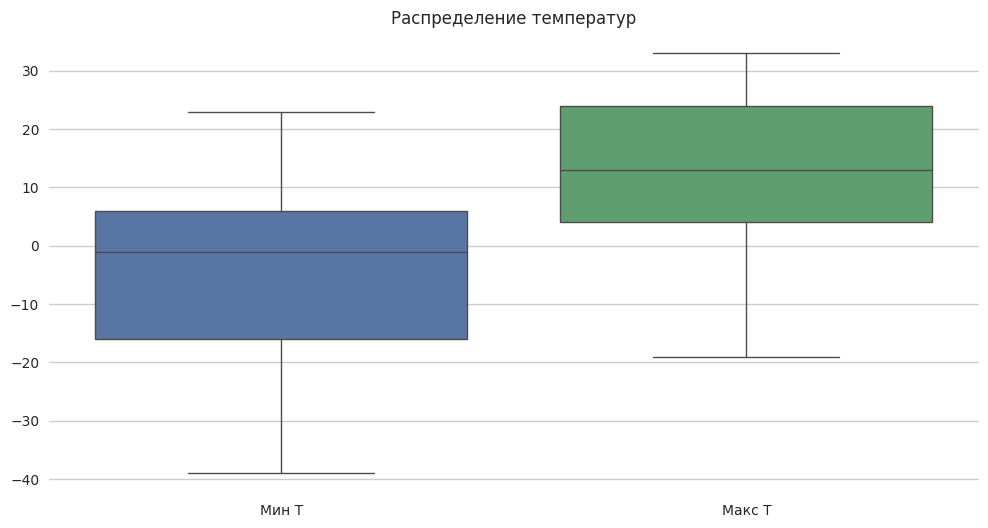

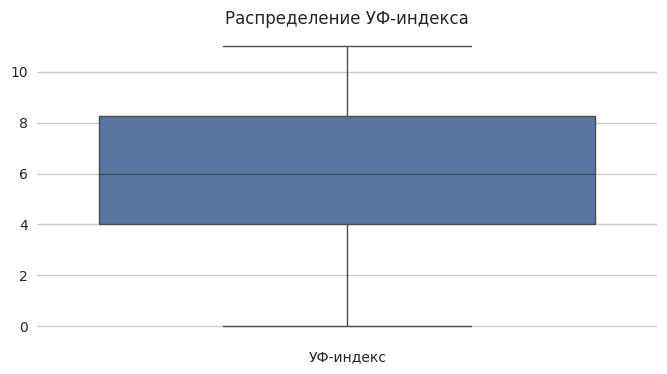

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


#Общая информация о данных
print('Общая информация о данных:')
print(df.info())
print('\n' + '-'*50 + '\n')

#Количиство наблюдений,  среднее арифм., стандартное отклонение, минимальное, максимальное, распределением по квартилям
print('Описательные статистики для числовых столбцов:')
print(df.describe().transpose())
print('\n' + '-'*50 + '\n')

#Количество пропусков
print('Количество пропущенных значений:')
print(df.isnull().sum())
print('\n' + '-'*50 + '\n')

#Уникальные значения
print('Уникальные города:', df['Город'].unique())
print('Уникальные годы:', df['Год'].unique())
print('Уникальные месяцы:', df['Месяц'].unique())
print('\n' + '-'*50 + '\n')

#Выбросы и boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Мин T', 'Макс T']])
plt.title('Распределение температур')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['УФ-индекс']])
plt.title('Распределение УФ-индекса')
plt.show()


In [108]:
#Вывод описательных статистик

#Группирую все данные по годам и городам, выделяю макс и мин значения для температуры и УФ индекса
city_year_stats = df.groupby(['Город', 'Год']).agg({
    'Мин T': 'min',
    'Макс T': 'max',
    'УФ-индекс': ['min', 'max']
}).reset_index()

city_year_stats.columns = ['Город', 'Год', 'Мин T', 'Макс T', 'УФ-индекс_min', 'УФ-индекс_max']

#Делаю новый столбец 'Температура' для мин и макс температуры
city_year_stats['Температура'] = city_year_stats['Мин T'].astype(str) + '/' + city_year_stats['Макс T'].astype(str)

#Аналогично для УФ индекса
city_year_stats['УФ-индекс'] = city_year_stats['УФ-индекс_min'].astype(str) + '/' + city_year_stats['УФ-индекс_max'].astype(str)

#Добавляю нужные для вывода столбцы
result_city_year_stats_df = city_year_stats[['Город', 'Год', 'Температура', 'УФ-индекс']]

print('Минимальные и максимальные значения температуры и УФ индекса для каждого города по годам:\n')
print(result_city_year_stats_df)


#Группирую данные по городам, выделяя макс и мин значения для температуры и УФ индекса за весь период(2020-2023)
city_years_stats = df.groupby('Город').agg({
    'Мин T': 'min',
    'Макс T': 'max',
    'УФ-индекс': ['min', 'max']
}).reset_index()

city_years_stats.columns = ['Город', 'Мин T', 'Макс T', 'УФ-индекс_min', 'УФ-индекс_max']

# Создаю новый столбец 'Температура' для мин и макс температуры
city_years_stats['Температура'] = city_years_stats['Мин T'].astype(str) + '/' + city_years_stats['Макс T'].astype(str)

# Аналогично для УФ индекса
city_years_stats['УФ-индекс'] = city_years_stats['УФ-индекс_min'].astype(str) + '/' + city_years_stats['УФ-индекс_max'].astype(str)

# Добавляю нужные для вывода столбцы
result_city_years_stats_df = city_years_stats[['Город', 'Температура', 'УФ-индекс']]

print('\n' + '-'*110 + '\n') #разделитель
print('Минимальные и максимальные значения температуры и УФ индекса для каждого города за весь период (2020-2023):\n')
print(result_city_years_stats_df)


#Группирую данные по годам(учитываю все города) выделяя макс и мин значения для температуры и УФ индекса
years_stats = df.groupby('Год').agg({
    'Мин T': 'min',
    'Макс T': 'max',
    'УФ-индекс': ['min', 'max']
}).reset_index()

years_stats.columns = ['Год', 'Мин T', 'Макс T', 'УФ-индекс_min', 'УФ-индекс_max']

# Создаю новый столбец 'Температура' для мин и макс температуры
years_stats['Температура'] = years_stats['Мин T'].astype(str) + '/' + years_stats['Макс T'].astype(str)

# Аналогично для УФ индекса
years_stats['УФ-индекс'] = years_stats['УФ-индекс_min'].astype(str) + '/' + years_stats['УФ-индекс_max'].astype(str)

# Добавляю нужные для вывода столбцы
result_years_stats_df = years_stats[['Год', 'Температура', 'УФ-индекс']]

print('\n' + '-'*110 + '\n') #разделитель
print('Минимальные и максимальные значения температуры и УФ индекса(по выбранным городам) для каждого года:\n')
print(result_years_stats_df)

Минимальные и максимальные значения температуры и УФ индекса для каждого города по годам:

              Город   Год Температура УФ-индекс
0           Дербент  2020       -4/31      4/10
1           Дербент  2021       -7/32      4/11
2           Дербент  2022        0/33      4/10
3           Дербент  2023       -3/33      4/10
4            Москва  2020      -16/28       2/9
5            Москва  2021      -27/32       1/9
6            Москва  2022      -22/31       2/9
7            Москва  2023      -28/31       2/9
8             Певек  2020      -39/15       0/8
9             Певек  2021      -38/19       0/8
10            Певек  2022      -38/16       0/8
11            Певек  2023      -37/21       0/8
12  Санкт-Петербург  2020       -7/27       1/9
13  Санкт-Петербург  2021      -31/33       1/9
14  Санкт-Петербург  2022      -19/29       1/9
15  Санкт-Петербург  2023      -21/32       1/9

--------------------------------------------------------------------------------------------

#Выводы по собранным данным: данные поступили с ошибкой в определении типа переменных, что было исправлено. Типы данных описаны. Распределение данных о максимальных температурах по годам и городам, а также распределение значений УФ индекса близко к нормальному(анализ ящика с усами), в то время как распределение данных о минимальных температурах смещено к верхней границе.Все значения находятся в пределах минимального и максимального -> выбросов нет

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-110-d560c43a0b7e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Год', y='Мин T', hue='Город', ci=None)


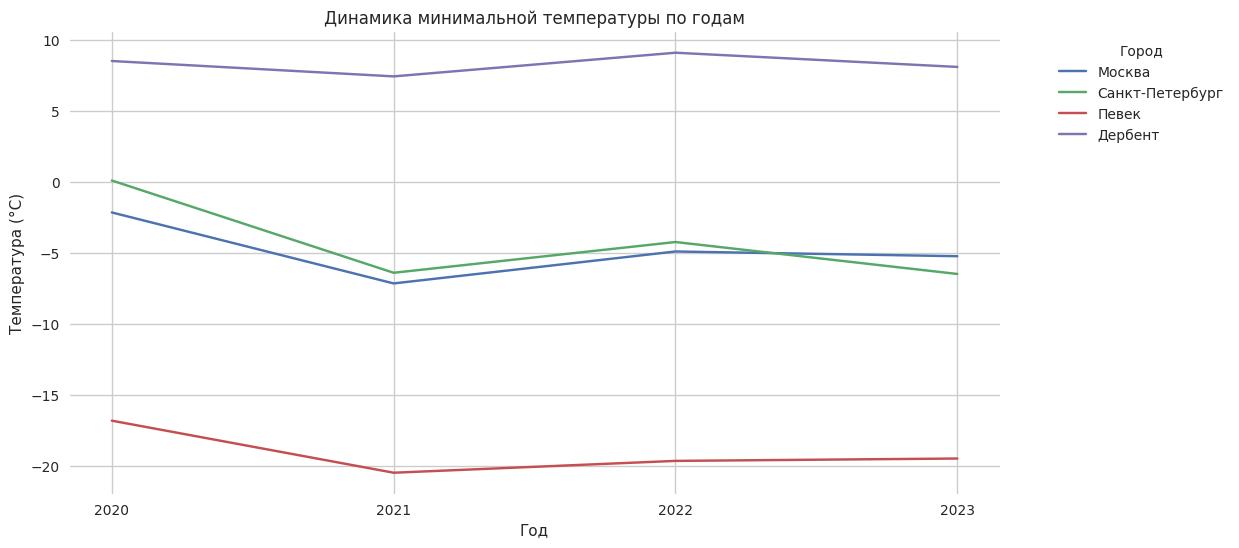

In [110]:
#Динамика минимальной температуры по годам
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Год', y='Мин T', hue='Город', ci=None)

plt.title('Динамика минимальной температуры по годам')
plt.ylabel('Температура (°C)')
plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-111-3c48e8e160b1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Год', y='Макс T', hue='Город', ci=None)


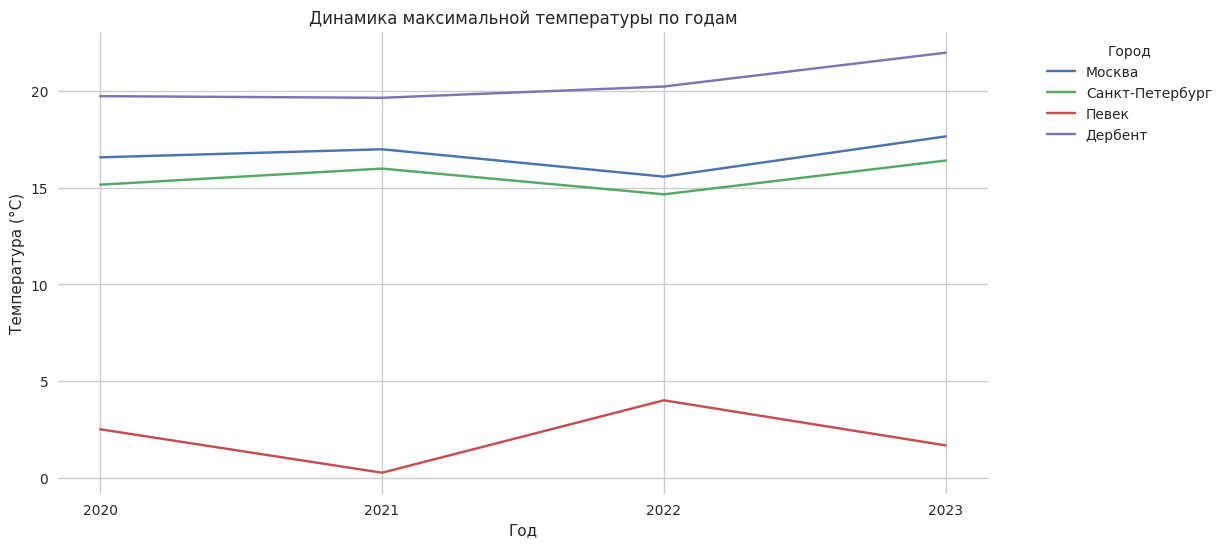

In [111]:
#Динамика максимальной температуры по годам
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Год', y='Макс T', hue='Город', ci=None)

plt.title('Динамика максимальной температуры по годам')
plt.ylabel('Температура (°C)')
plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-116-18880a07fc55>:29: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  seasonal_data = df.groupby(['Город', 'Сезон', 'Год_сезона'])[target_col].agg(agg_func).reset_index()
<ipython-input-116-18880a07fc55>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-116-18880a07fc55>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-116-18880a07fc55>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

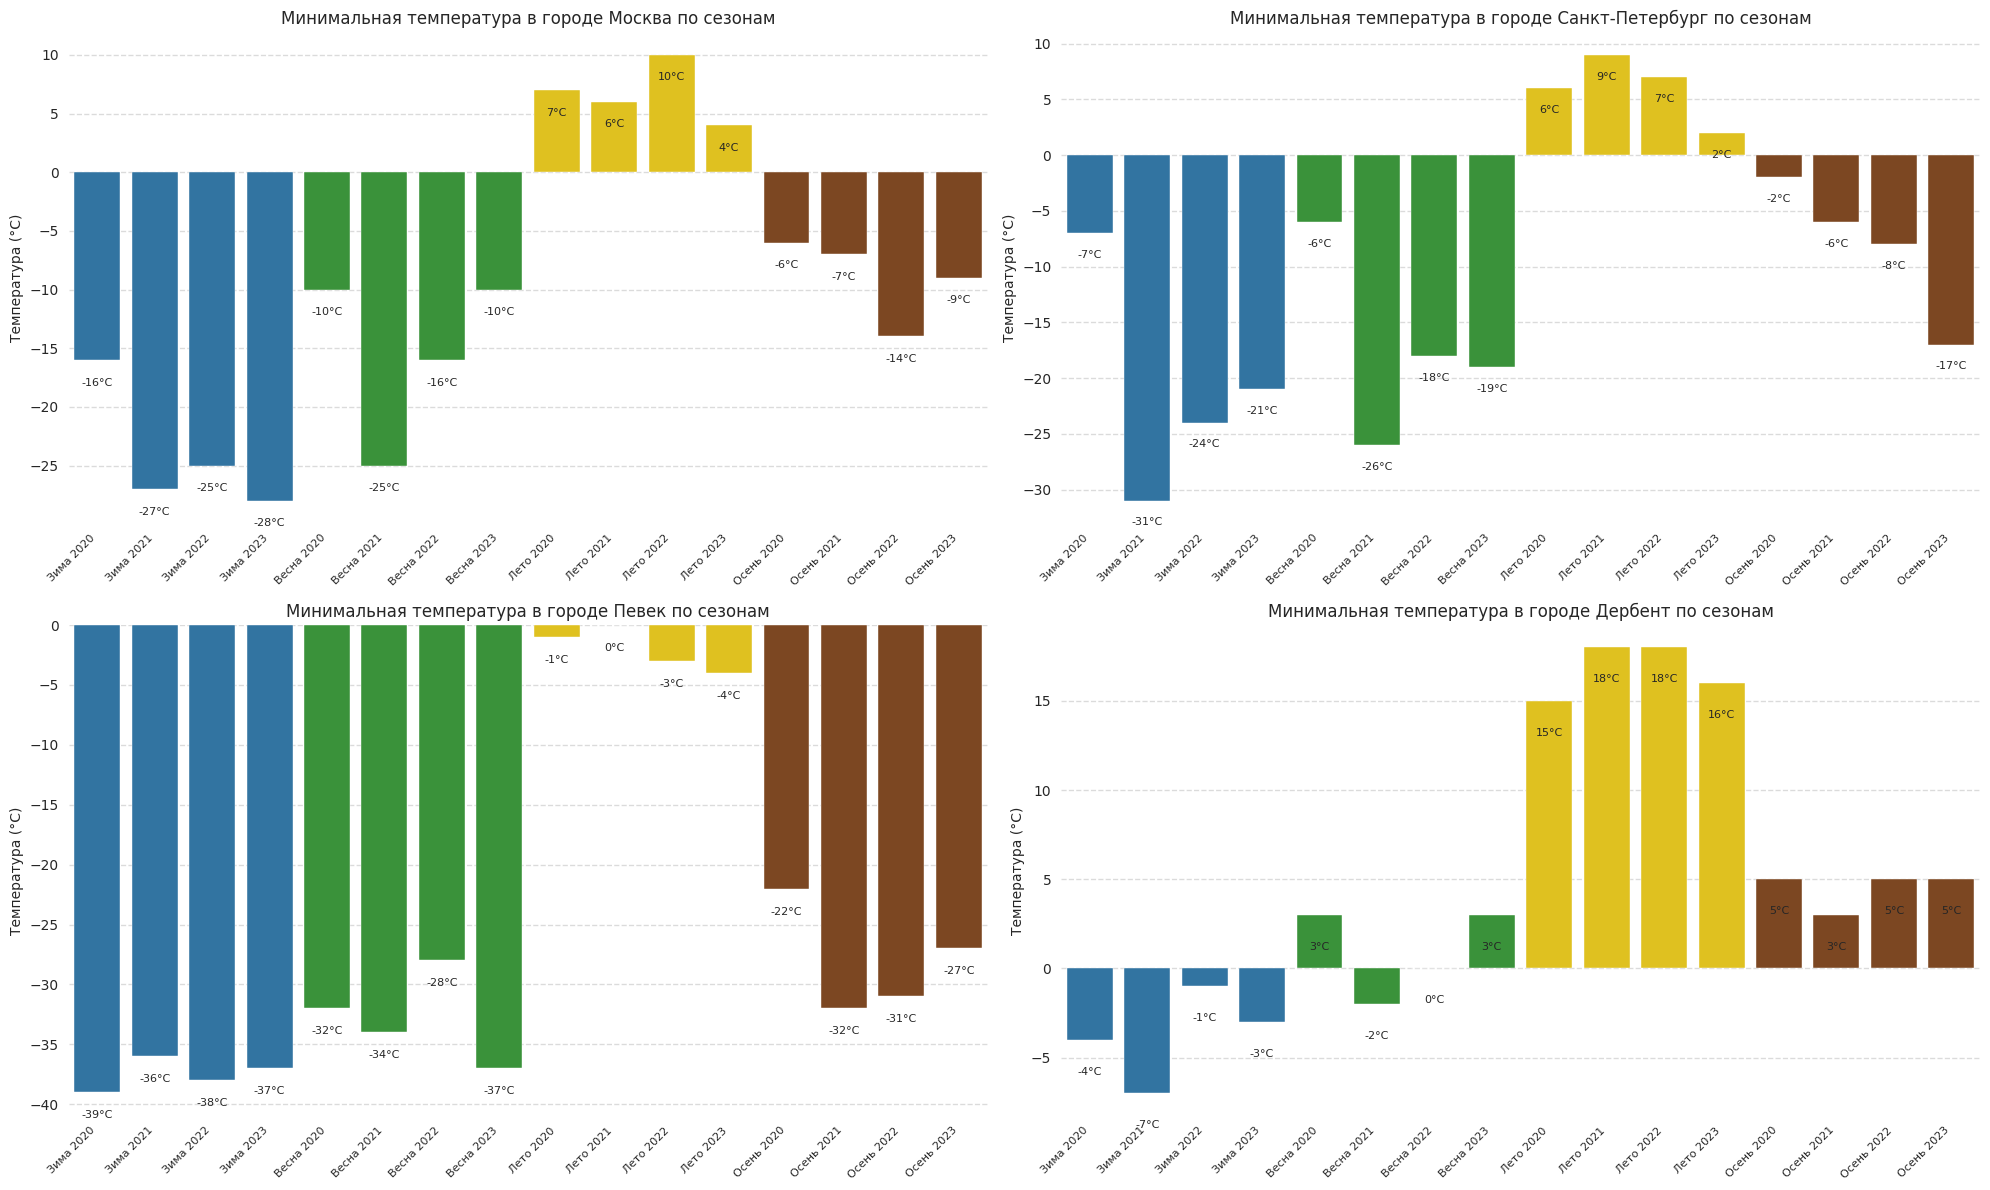

<ipython-input-116-18880a07fc55>:29: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  seasonal_data = df.groupby(['Город', 'Сезон', 'Год_сезона'])[target_col].agg(agg_func).reset_index()
<ipython-input-116-18880a07fc55>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-116-18880a07fc55>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-116-18880a07fc55>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

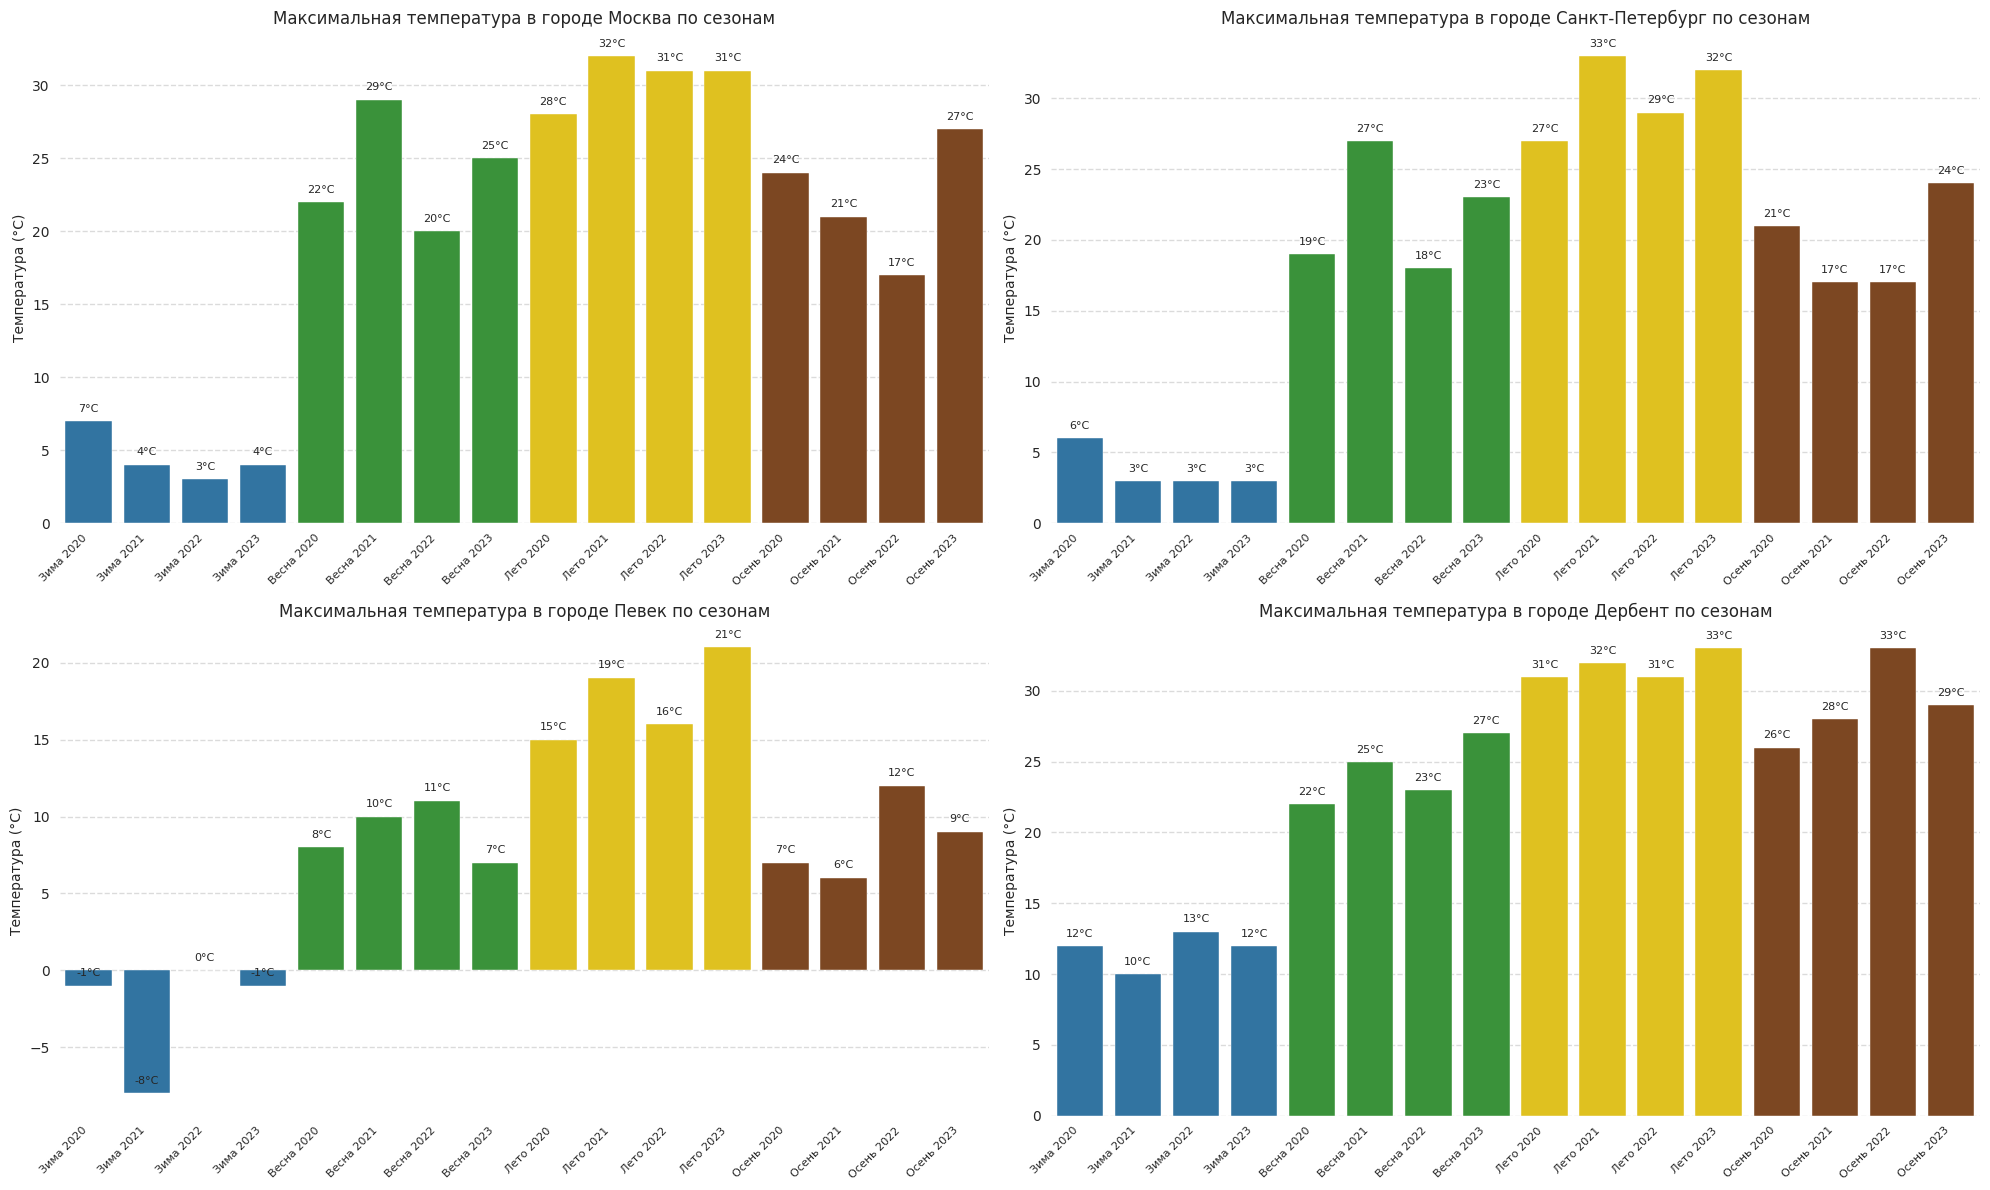

In [116]:
def make_plot_based_on_seasonal_temperature(data, temp_type='max'): #функция для отрисовки столбчатых диаграм с температурой(максимальной или минимальной) по сезонам

    #Словарь месяц:сезон
    season_map = {
        'Январь': 'Зима', 'Февраль': 'Зима', 'Март': 'Весна',
        'Апрель': 'Весна', 'Май': 'Весна', 'Июнь': 'Лето',
        'Июль': 'Лето', 'Август': 'Лето', 'Сентябрь': 'Осень',
        'Октябрь': 'Осень', 'Ноябрь': 'Осень', 'Декабрь': 'Зима'
    }

    #Копирую данне и добавляю сезоны
    df = data.copy()
    df['Сезон'] = df['Месяц'].map(season_map)

    #Это чтобы декабрь не перепрыгивал на другой год
    df['Год_сезона'] = df['Год'].astype(int)
    df.loc[df['Месяц'] == 'Декабрь', 'Год_сезона'] += 1
    df = df[df['Год_сезона'] <= 2023]

    #Выбираем столбец для анализа
    if temp_type == 'max':
      target_col = 'Макс T'
      agg_func = max
    elif temp_type == 'min':
       target_col = 'Мин T'
       agg_func = min

    #Группирую данные
    seasonal_data = df.groupby(['Город', 'Сезон', 'Год_сезона'])[target_col].agg(agg_func).reset_index()
    seasonal_data['Период'] = seasonal_data['Сезон'] + ' ' + seasonal_data['Год_сезона'].astype(str)

    #Сезоны по порядку
    season_order = ['Зима', 'Весна', 'Лето', 'Осень']
    seasonal_data['Сезон'] = pd.Categorical(seasonal_data['Сезон'], categories=season_order, ordered=True)
    seasonal_data = seasonal_data.sort_values(['Город', 'Сезон', 'Год_сезона'])

    #Изменяю цвета столбцов по сезонам для лучшей читабельности графика
    season_colors = {
        'Зима': '#1f77b4',    #Синий
        'Весна': '#2ca02c',    #Зеленый
        'Лето': '#ffd700',     #Желтый
        'Осень': '#8b4513'     #Коричневый
    }

    #Строю графики для всех городов
    cities = ['Москва', 'Санкт-Петербург', 'Певек', 'Дербент']
    plt.figure(figsize=(20, 12))

    temp_label = 'Максимальная' if temp_type == 'max' else 'Минимальная'

    for i, city in enumerate(cities, 1):
        plt.subplot(2, 2, i) #располагаю графики в пространстве 2 на 2, чтобы можно было сразу посмотреть и увидеть разницу значений
        city_data = seasonal_data[seasonal_data['Город'] == city]

        sns.barplot(
            data=city_data,
            x='Период',
            y=target_col,
            palette=[season_colors[s] for s in city_data['Сезон']]
        )

        plt.title(f'{temp_label} температура в городе {city} по сезонам', fontsize=12)
        plt.xlabel('')
        plt.ylabel(f'Температура (°C)', fontsize=10)
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        #Добавляю значение над каждым столбцом
        for index, value in enumerate(city_data[target_col]):
            plt.text(index, value + (0.5 if temp_type == 'max' else -1.5),
                     f'{value}°C',
                     ha='center',
                     va='bottom' if temp_type == 'max' else 'top',
                     fontsize=8)

    plt.tight_layout()
    plt.show()

#Вывожу два набора данных, про минимальную температуру и про максимальную
make_plot_based_on_seasonal_temperature(df, temp_type='min')
make_plot_based_on_seasonal_temperature(df, temp_type='max')


In [123]:
import numpy as np
from sklearn.linear_model import LinearRegression #библиотека для линии тренда

<Figure size 1200x800 with 0 Axes>

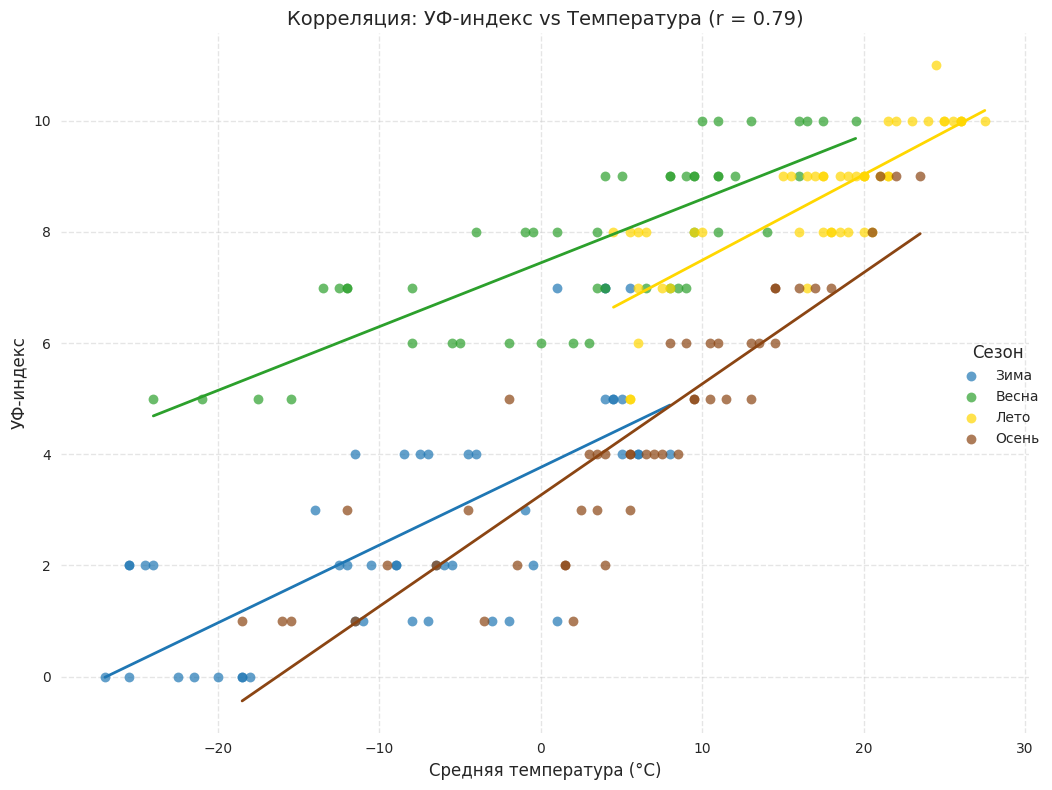

In [137]:
#Строю график связывающий температуру и УФ индекс, ожидаю, что связь будет сильная положительная
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Подчищаю данные
df_clean = df.dropna(subset=['Средняя T', 'УФ-индекс'])

#Базовое присвоение цветов сезонам и выбор стиля
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
colors = {'Зима': '#1f77b4', 'Весна': '#2ca02c', 'Лето': '#ffd700', 'Осень': '#8b4513'}

#Строю scatter plot каждого сезона
g = sns.lmplot(
    data=df_clean,
    x='Средняя T',
    y='УФ-индекс',
    hue='Сезон',
    palette=colors,
    ci=None,  #отключаю "доверительный интервал" он показывал нужную информацию, о близости точек к линии тенденции, но сильно перегружал график
    height=8,
    aspect=1.2,
    scatter_kws={'s': 50, 'alpha': 0.7, 'edgecolor': 'w'},
    line_kws={'lw': 2}
)

#Расситываю корреляцию
corr_coef, p_value = stats.pearsonr(df_clean['Средняя T'], df_clean['УФ-индекс'])

#Настройка оформления
plt.title(f'Корреляция: УФ-индекс vs Температура (r = {corr_coef:.2f})', fontsize=14)
plt.xlabel('Средняя температура (°C)', fontsize=12)
plt.ylabel('УФ-индекс', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

#Делаю общую легенду, чтобы не загрязнять график
g._legend.set_title('Сезон')
plt.setp(g._legend.get_texts(), fontsize=10)
plt.setp(g._legend.get_title(), fontsize=12)

plt.tight_layout()
plt.show()



In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Теперь строю график, отображающий динамику температуры и УФ-индекса по сезонам (2020-2023)
# Создание столбца со средней температурой
df['Средняя T'] = (df['Мин T'] + df['Макс T']) / 2


#Группирую данные
seasonal_data = df.groupby(['Город', 'Сезон', 'Год_сезона'])[['Средняя T', 'УФ-индекс']].mean().reset_index()

#Базовые цвета для сезонов
season_colors = {
    'Зима': '#1f77b4',
    'Весна': '#2ca02c',
    'Лето': '#ffd700',
    'Осень': '#8b4513'
}

#Аналогично предыдущим графикам делаю сетку 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True, sharey=False)
cities = ['Москва', 'Санкт-Петербург', 'Певек', 'Дербент']

#Элементы для легенды
handles, labels = [], []

for idx, city in enumerate(cities):
    ax = axes[idx // 2, idx % 2]
    city_df = seasonal_data[seasonal_data['Город'] == city]

    #Добавляю вторую ось Y для УФ-индекса
    ax2 = ax.twinx()

    #Строю линии для каждого сезона
    for season in ['Зима', 'Весна', 'Лето', 'Осень']:
        season_df = city_df[city_df['Сезон'] == season]

        #Ось температуры
        line_temp, = ax.plot(
            season_df['Год_сезона'],
            season_df['Средняя T'],
            color=season_colors[season],
            marker='o',
            linestyle='--',
            label=f'{season} (T)'
        )

        #Ось УФ индекса
        line_uv, = ax2.plot(
            season_df['Год_сезона'],
            season_df['УФ-индекс'],
            color=season_colors[season],
            marker='s',
            linestyle=':',
            label=f'{season} (УФ)'
        )

        #Делаю легенду (общую, поэтому только на первой итерации)
        if idx == 0:
            handles.extend([line_temp, line_uv])
            labels.extend([f'{season} (Температура)', f'{season} (УФ)'])

    #Оформление
    ax.set_title(city, fontsize=14, pad=15)
    ax.set_xlabel('Год', fontsize=12)
    ax.set_ylabel('Средняя температура (°C)', fontsize=12)
    ax2.set_ylabel('УФ-индекс', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

#Общая легенда над всеми графиками (для каждого своя - излишне)
fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=4,
    fontsize=12,
    frameon=False
)

plt.suptitle('Динамика температуры и УФ-индекса по сезонам (2020-2023)', fontsize=16, y=1.15)
plt.tight_layout()
plt.show()

#не вижу ошибку, так как не удаляла столбцы, но я запомнила, как выглядел график, поэтому анализ смогу написать, а вообще кошмар

TypeError: unsupported operand type(s) for /: 'str' and 'int'

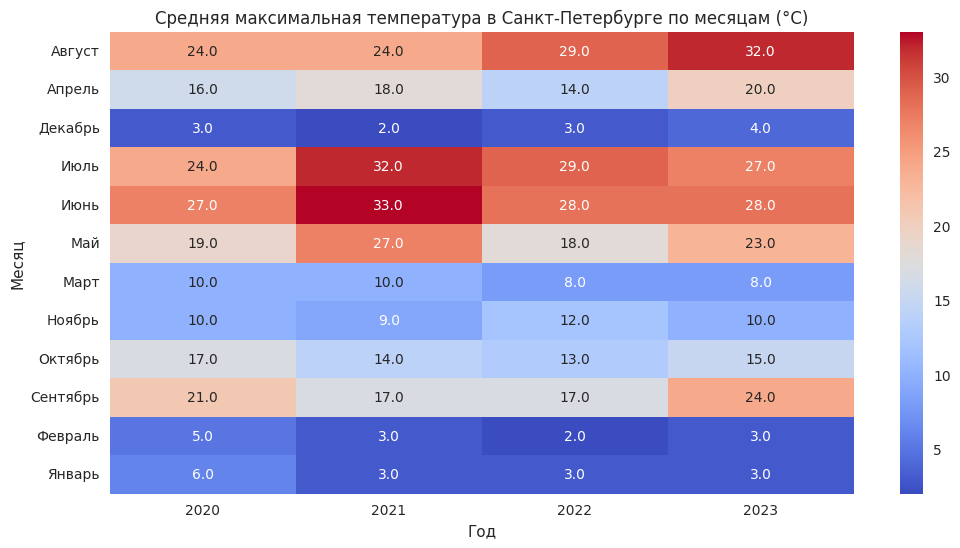

In [98]:
#График надежды, показывающий, что лето 2025 года имеет все шансы быть теплым (судя по тенденциям летних месяцев)
sp_data = df[df['Город'] == 'Санкт-Петербург'].pivot_table(index='Месяц', columns='Год', values='Макс T')
plt.figure(figsize=(12, 6))
sns.heatmap(sp_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Средняя максимальная температура в Санкт-Петербурге по месяцам (°C)')
plt.xlabel('Год')
plt.ylabel('Месяц')
plt.show()

Анализ и выводы: по приведенным графикам и вычисленным трендам можно сделать следующие выводы: Глобальное потепление - реальность, графики демонстрируют тенденцию на повышение температур за 2020-2023 годы, как в зимний, так и в летний период. Анализ температур по годам и сезонам показывает, что в 13 случаях из 16 наибольшоя температура сезона 2023 года выше, чем того же сезона 2020 года. Выбранный для парсинга показатель УФ индекс действительно имеет сильную положительную корреляцию с температурой, но что более важно, показатели УФ индекса повторяют тенденции увеличения температуры и ее увеличения, а значит и подтверждают влияние Глобального потепления (ведь при более высоких показателях УФ индекса озоновой слой истончается, пропуская больше солнечных лучей и увеличивая среднююю температуру). Интересно и то, что даже в самом северном городе страны и противоположном ему южном тенденции остаются теми же, если обратиться к графикам изменений температуры по сезонам разных лет. Это наталкивает на мысль о том, что и северные города могут однажды превратиться в южные, их суровый климат все равно поддается общему влиянию и дублирует показатели Москвы и Санкт-Петербурга (в своем соотношении температур). Также интересно выделить общие скачки температур с 2020 по 2021 год. При анализе самых низких температур, данные в 2020 году были выше, чем в 2021 (те температура в 2020 году была больше, чем в 2021) в Санкт-Петербурге амплитуда составила 24 градуса. Выбросом такое значение считать нельзя, так как оно находится в пределах минимальной температуры приведенных данных, поэтому можно вспомнить эпидемию Covid-19. Такие температурные скачки могут быть, например, следствием режима самоизоляции огромнго количества людей по всему миру. Люди не выходили на улицу, не нагревали лишний раз атмосферу Земли своим дыханием.  Приостановление производственных процессов также могло привести к таким изменениям. Таким образом, проанализировав температурный режим и уровень УФ индексов сезонов 2020-2023 года я подтвердила существование четкой корреляции между температурой и УФ индексом (чем выше температура, тем выше УФ индекс, а значит и опасность солнечных лучей для человека), а также, взяв за основу полученные данные, смогла проследить влияние глобального потепления на города Росии, расположенные в разных частях страны.